Laboratorio 1: Taller IA.

Nombre: Matías Jesús Egaña Alfaro.

Rut: 20.457.413-8. 

Asignatura: Inteligencia Artificial.

Profesor: Humberto Farias Aroca.

In [4]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Problema:

Una empresa de bienes raíces estás interesado en predecir el precio de las casas en función de su tamaño (en pies cuadrados) y la cantidad de habitaciones.

Tamaño de la casa (en pies cuadrados): valores aleatorios entre 800 y 4000.

Número de habitaciones: valores aleatorios entre 2 y 6.

Precio de la casa: se calcula como una combinación lineal de las anteriores.

In [7]:
np.random.seed(42)  # Fijamos la semilla para reproducibilidad

# Generar datos aleatorios
n_samples = 1000
tamaño_casa = np.random.randint(800, 4000, size=n_samples)
num_habitaciones = np.random.randint(2, 7, size=n_samples)
precio_casa = 100 * tamaño_casa + 50000 * num_habitaciones + np.random.normal(0, 10000, size=n_samples)

# Crear DataFrame
df = pd.DataFrame({
    'Tamaño_Casa': tamaño_casa,
    'Num_Habitaciones': num_habitaciones,
    'Precio_Casa': precio_casa
})

# Visualizar las primeras filas del DataFrame
print(df.head())

   Tamaño_Casa  Num_Habitaciones    Precio_Casa
0         3974                 2  498077.535728
1         1660                 6  470001.144746
2         2094                 5  460880.317582
3         1930                 3  326257.022795
4         1895                 2  293778.706772


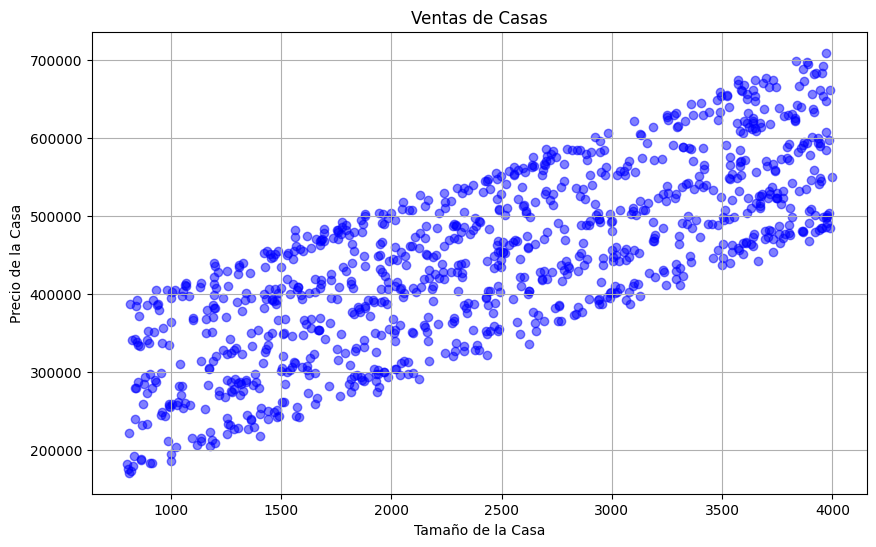

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Tamaño_Casa'], df['Precio_Casa'], color='blue', alpha=0.5)
plt.title('Ventas de Casas')
plt.xlabel('Tamaño de la Casa')
plt.ylabel('Precio de la Casa')
plt.grid(True)
plt.show()

In [9]:
lin_reg = LinearRegression()

In [10]:
lin_reg.fit(df['Tamaño_Casa'].values.reshape(-1, 1), df['Precio_Casa'].values)

LinearRegression()

In [11]:
print("\nCoeficiente de la regresión:", lin_reg.coef_[0])
print("Intercepto de la regresión:", lin_reg.intercept_)


Coeficiente de la regresión: 93.70963151825237
Intercepto de la regresión: 215115.9741516649


In [12]:
tamaño_pred = np.array([[800]])  # Tamaño de la casa para predecir el precio
precio_pred = lin_reg.predict(tamaño_pred)  # Predicción del precio de la casa
print('Precio predicho para una casa de 800 pies cuadrados:', precio_pred[0])

Precio predicho para una casa de 800 pies cuadrados: 290083.6793662668


In [14]:
X_min_max = np.array([[df["Tamaño_Casa"].min()], [df["Tamaño_Casa"].max()]])
y_pred = lin_reg.predict(X_min_max)
print('Ingresos predichos para mínimos y máximos de Tamaño de la Casa:', y_pred)

Ingresos predichos para mínimos y máximos de Tamaño de la Casa: [290177.38899779 589673.37133012]


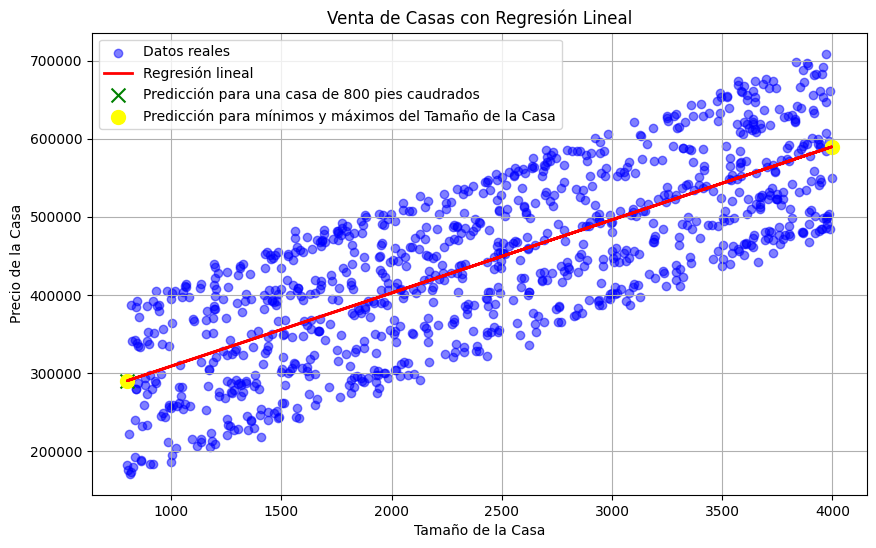

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Tamaño_Casa'], df['Precio_Casa'], color='blue', alpha=0.5, label='Datos reales')
plt.plot(df['Tamaño_Casa'], lin_reg.predict(df['Tamaño_Casa'].values.reshape(-1, 1)), color='red', linewidth=2, label='Regresión lineal')
plt.scatter(tamaño_pred, precio_pred, color='green', marker='x', s=100, label='Predicción para una casa de 800 pies caudrados')
plt.scatter(X_min_max, y_pred, color='yellow', marker='o', s=100, label='Predicción para mínimos y máximos del Tamaño de la Casa')
plt.title('Venta de Casas con Regresión Lineal')
plt.xlabel('Tamaño de la Casa')
plt.ylabel('Precio de la Casa')
plt.legend()
plt.grid(True)
plt.show()